In [1]:
from google.colab import files
uploaded=files.upload()

Saving quikr_car.csv to quikr_car (1).csv


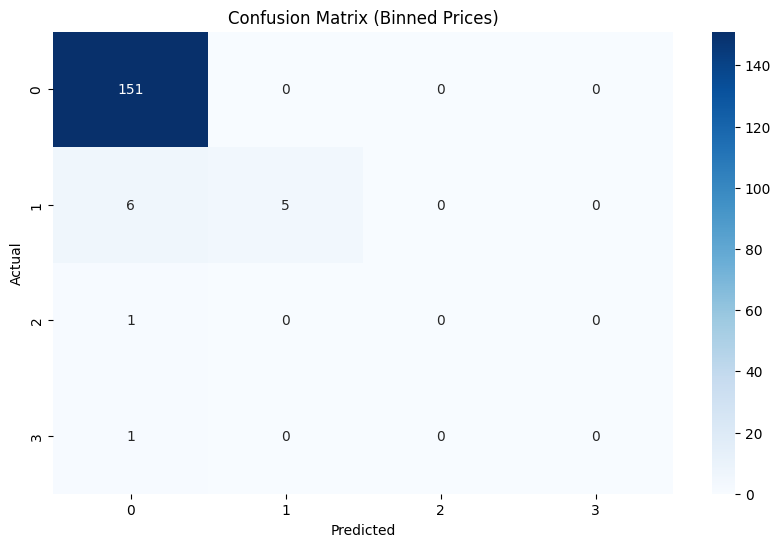

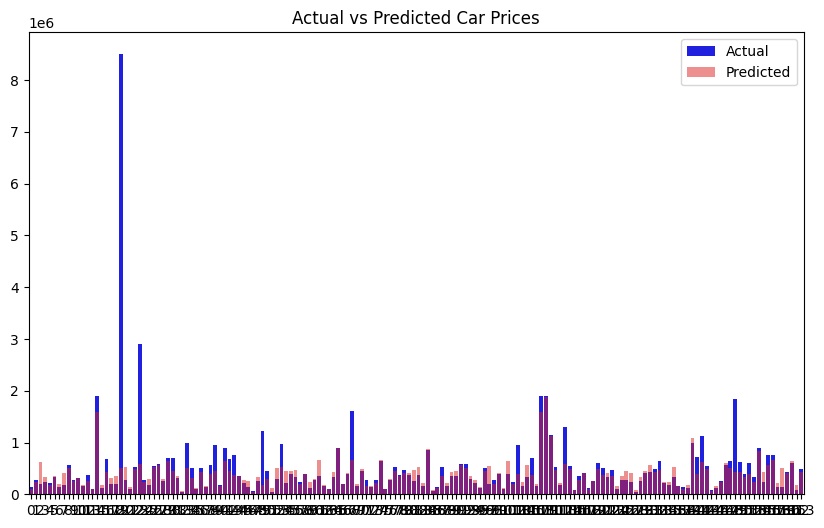

Accuracy: 0.9512195121951219
R2 Score: 0.15622086470167662
MSE: 471830602717.4035


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv("quikr_car.csv")
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',', '').astype(int)
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.extract('(\d+)').astype(float)
df = df.dropna()
le_fuel = LabelEncoder()
df['fuel_type'] = le_fuel.fit_transform(df['fuel_type'])
le_company = LabelEncoder()
df['company'] = le_company.fit_transform(df['company'])
X = df[['year', 'kms_driven', 'fuel_type', 'company']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred, -3)
y_test_rounded = np.round(y_test.values, -3)
bins = np.linspace(min(y_test_rounded.min(), y_pred_rounded.min()), max(y_test_rounded.max(), y_pred_rounded.max()), 10)
y_test_binned = np.digitize(y_test_rounded, bins)
y_pred_binned = np.digitize(y_pred_rounded, bins)
cm = confusion_matrix(y_test_binned, y_pred_binned)
acc = accuracy_score(y_test_binned, y_pred_binned)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Binned Prices)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(y_test))), y=y_test.values, color='blue', label='Actual')
sns.barplot(x=list(range(len(y_pred))), y=y_pred, color='red', alpha=0.5, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Car Prices')
plt.show()

print("Accuracy:", acc)
print("R2 Score:", r2)
print("MSE:", mse)
